In [1]:
# 1. Add the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
# 2. Load data MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


In [3]:
# 3. Reshape the data to the correct size required by keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Initial medical data ', y_train[0])
print('Data y after one-hot encoding ',Y_train[0])

Initial medical data  5
Data y after one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# 5. Model definition
model = Sequential()
 
# Add Convolutional layer with 32 kernels, kernel size 3*3
# use sigmoid function as activation and specify input_shape for first layer
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))

# Add Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Add Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer convert from tensor to vector
model.add(Flatten())

# Add a Fully Connected layer with 128 nodes and use the sigmoid . function
model.add(Dense(128, activation='sigmoid'))

# Output layer with 10 nodes and use softmax function to convert to probability.
model.add(Dense(10, activation='softmax'))

In [6]:
# 6. Compile model, specify which loss_function function to use, which method to use to optimize the loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 7. Implement train model with data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 0.2946 - accuracy: 0.9175 - val_loss: 0.0685 - val_accuracy: 0.9818
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.0578 - accuracy: 0.9837 - val_loss: 0.0483 - val_accuracy: 0.9865
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.0367 - accuracy: 0.9897 - val_loss: 0.0429 - val_accuracy: 0.9878
Epoch 4/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.0239 - accuracy: 0.9933 - val_loss: 0.0475 - val_accuracy: 0.9866
Epoch 5/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.0171 - accuracy: 0.9952 - val_loss: 0.0402 - val_accuracy: 0.9885
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.0105 - accuracy: 0.9976 - val_loss: 0.0411 - val_accuracy: 0.9886
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.0077 - accuracy: 0.9982 - val_loss: 0.0392 -

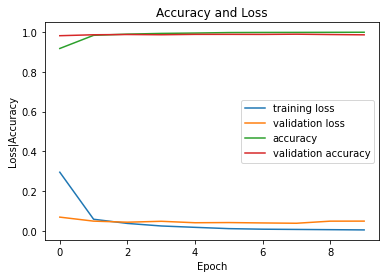

In [8]:
# 8. Plot loss, accuracy graph of training set and validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [9]:
# 9. Model evaluation with test set data
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04107574373483658, 0.9872000217437744]


Predicted value:  7


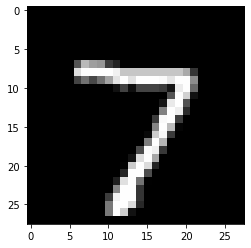

In [11]:
# 10. Photo prediction
plt.imshow(X_test[0].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,28,28,1))
print('Predicted value: ', np.argmax(y_predict))